# Exploração dos Dados

Carregue a base de dados e explore suas características

Analise estatísticas descritivas e visualize distribuições relevantes

### Carregamento da base

Fonte dos dados: https://www.kaggle.com/datasets/mirichoi0218/insurance

In [2]:
import pandas as pd

df = pd.read_csv('insurance.csv')

print(df.head(5))

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


### Verificação de inconsistências

In [3]:
# Verifica inconsistências
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Analise Descritiva

In [4]:
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


### Visualização de Distribuições

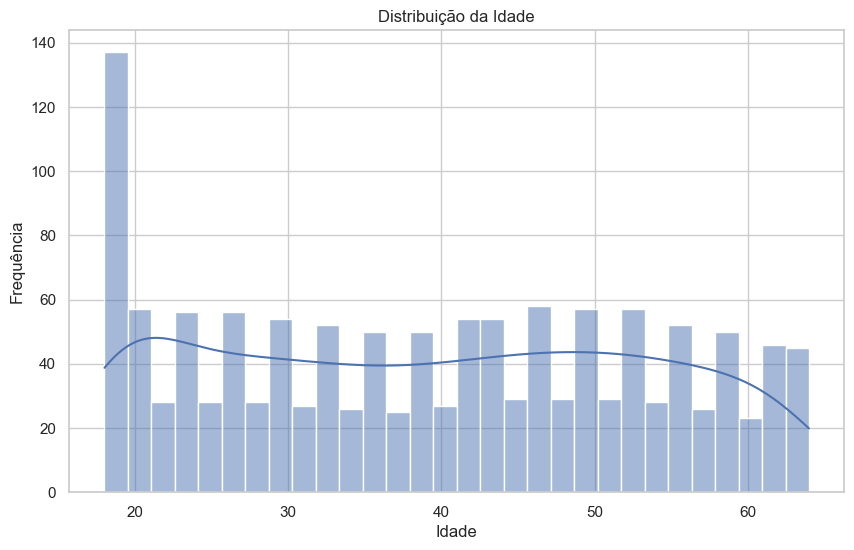

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar visualizações
sns.set(style="whitegrid")

# Histograma da idade
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

Com o histograma acima, podemos analisar que em nossa base existe uma quantidade maior de pessoas que possuem menos de 20 anos. Para os demais anos, podemos averiguar que é uma base relativamente bem distribuída.

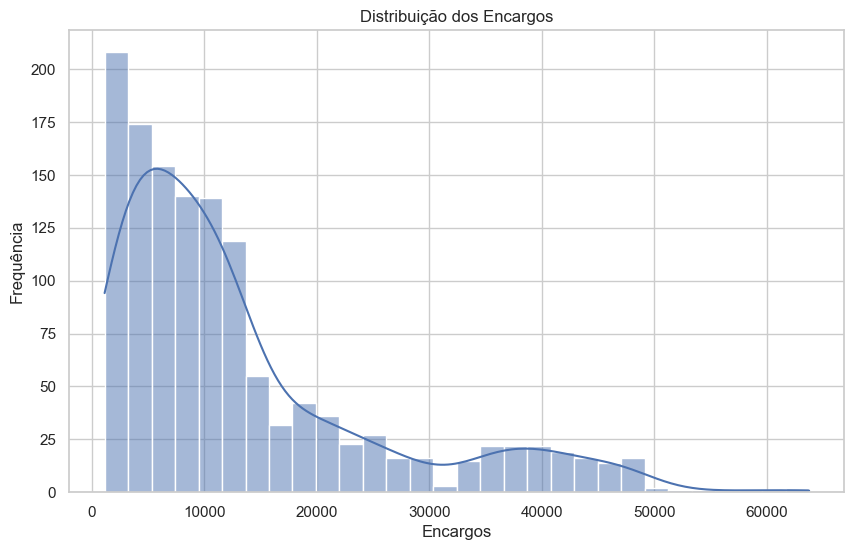

In [111]:
# Histograma dos encargos
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], bins=30, kde=True)
plt.title('Distribuição dos Encargos')
plt.xlabel('Encargos')
plt.ylabel('Frequência')
plt.show()

Com a distribuição dos encargos, podemos notar que a maior parte dos custos, encontra-se em valores menores e a frequência vai diminuindo conforme os valores aumentam. Talvez, por custos maiores significarem doenças mais graves e menos frequentes. Ou seja, temos um público relativamente saudável.

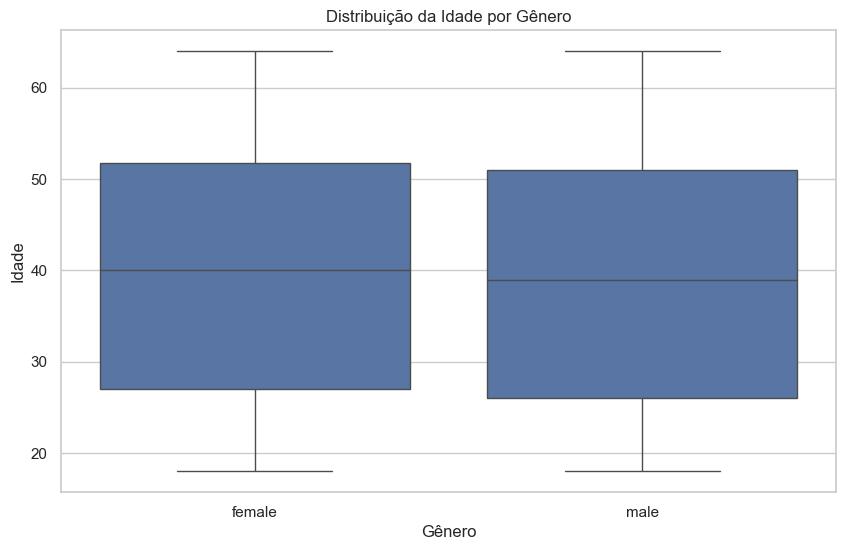

In [12]:
# Boxplot da idade por gênero
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='age', data=df)
plt.title('Distribuição da Idade por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Idade')
plt.show()

Analisando o gráfico acima, podemos notar que o público feminino é ligeiramente mais velho que o masculino. Sendo que não possui membros na faixa menor de idade.

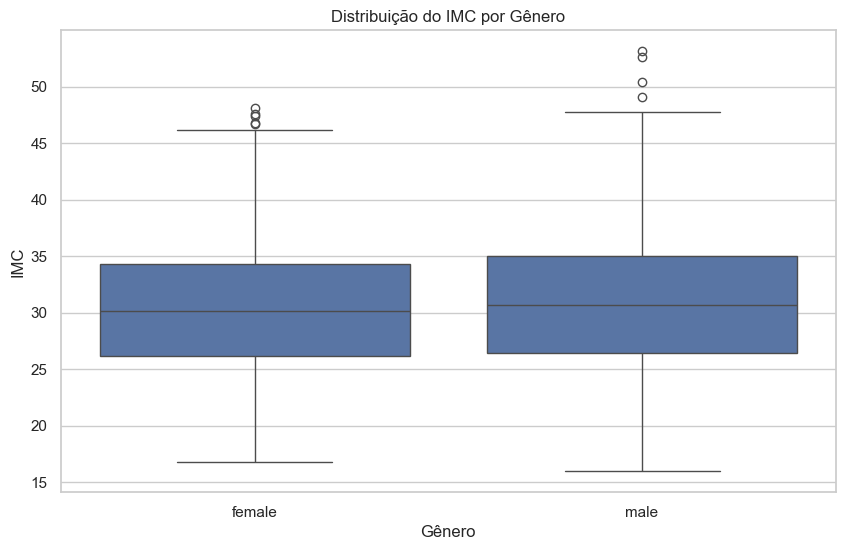

In [110]:
# Boxplot do IMC por gênero
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='bmi', data=df)
plt.title('Distribuição do IMC por Gênero')
plt.xlabel('Gênero')
plt.ylabel('IMC')
plt.show()

Já com o gráfico contendo a distribuição do IMC por Gênero, podemos observar que o público masculino é o tende a ter uma contagem de IMC ligeiramente maior, e também é o público que contém mais outliers para valores maiores.

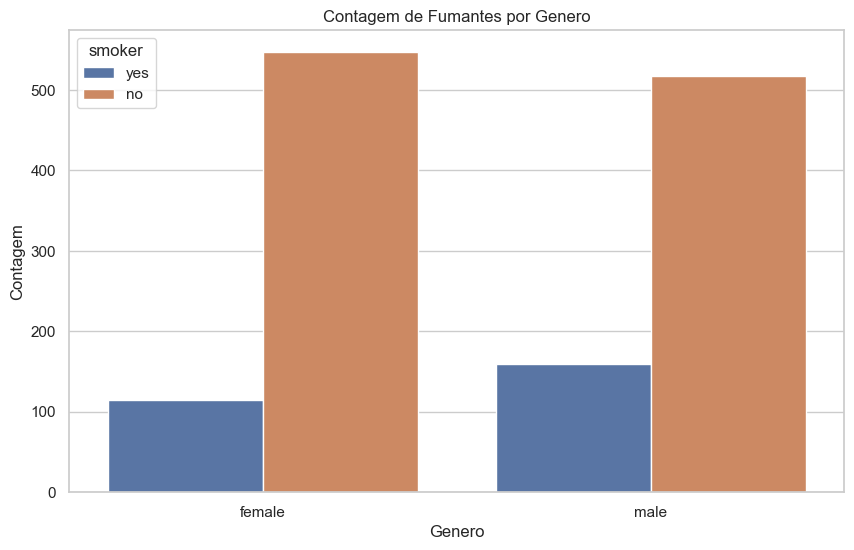

In [8]:
# Contagem de fumantes por genero
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='smoker', data=df)
plt.title('Contagem de Fumantes por Genero')
plt.xlabel('Genero')
plt.ylabel('Contagem')
plt.show()

Na contagem de fumantes por gênero, podes inferir dois fatos:

    1 - A maioria do público não é fumante.
    2 - A maiora dos fumantes são homens.

Até agora, podemos notar que há algumas diferenças nas distribuições entre o público feminino e masculino. 

Como o público masculino ser a maioria entre os fumantes, terem o imc, porém são relativamente mais jovens.

O que nos leva a seguinte pergunta:

    Será que também há diferença na distribuição dos custos por gênero ?

Vamos plotar essa distribuição em um bloxplot para podermos averiguar.

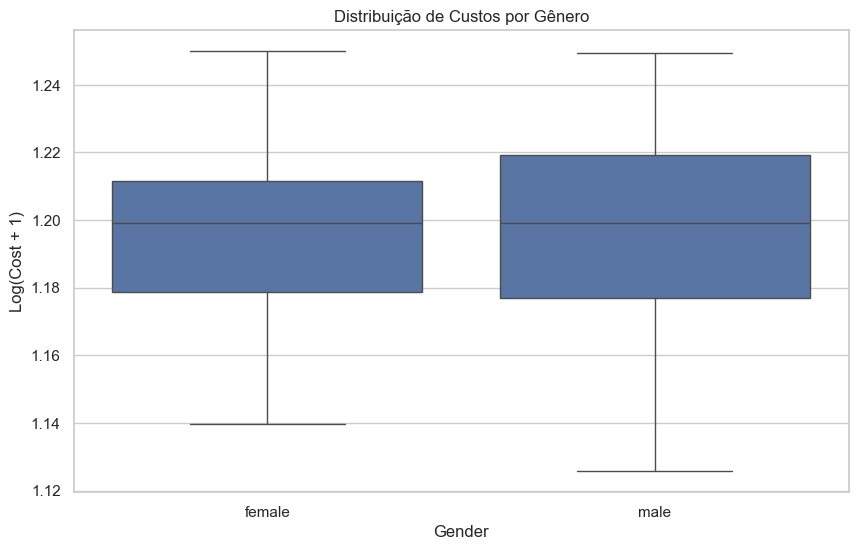

In [13]:
import numpy as np

# Transforma os valores de custos em logaritmos, afim de gerar um boxplot com visualização facilitada.
df['charges'] = np.log1p(df['charges'])

# Boxplot dos custos por genero
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Distribuição de Custos por Gênero')
plt.xlabel('Gender')
plt.ylabel('Log(Cost + 1)')
plt.show()

Com a distribuição dos custos, podemos verificar que o público masculino também gera mais custos que o feminino.

Estas diferenças nos fazem, em um primeiro momento, induzir que os custos do público masculino sempre serão maiores devido à possuirem uma maior tendência ao tabagismo e imc maior. 

Porém há outras possíveis correlações em jogo, como o fator da idade (onde o público masculino se mostra ser o mais jovem), região onde moram, quantidade de filhos e etc.

Para termos uma visão mais clara, contendo todas estas variáveis, vamos partir para uma análise de correlação.

### Análise de Correlacao

In [14]:
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Separa o dataframe original em dados categoricos e numericos
df_categoricos = df.select_dtypes(include=['object', 'category'])
df_numericos = df.select_dtypes(include=['number'])

# Inicializa OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Aplica o fit transform nos dados categoricos
one_hot_encoded = encoder.fit_transform(df_categoricos)

# Cria um DataFrame com os dados categoricos que tiveram o one hot encoding aplicado
encoded_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out())

# Concatena o DataFrame de dados numericos com o DataFrame que contém o resultado do one hot encoding
result = pd.concat([encoded_df, df_numericos], axis=1)

In [15]:
# Exibe as primeiras linhas para verificarmos o resultado
print(result.head(5))

   sex_female  sex_male  smoker_no  smoker_yes  region_northeast  \
0         1.0       0.0        0.0         1.0               0.0   
1         0.0       1.0        1.0         0.0               0.0   
2         0.0       1.0        1.0         0.0               0.0   
3         0.0       1.0        1.0         0.0               0.0   
4         0.0       1.0        1.0         0.0               0.0   

   region_northwest  region_southeast  region_southwest  age     bmi  \
0               0.0               0.0               1.0   19  27.900   
1               0.0               1.0               0.0   18  33.770   
2               0.0               1.0               0.0   28  33.000   
3               1.0               0.0               0.0   33  22.705   
4               1.0               0.0               0.0   32  28.880   

   children   charges  
0         0  1.215932  
1         1  1.142510  
2         3  1.175817  
3         0  1.223106  
4         0  1.171166  


In [115]:
# Exibe a quantidade de nulos gerados para validar se não foi criado um DataFrame com inconsistências
print("Quantidade de nulos:\n", result.isnull().sum())

Quantidade de nulos:
 sex_female          0
sex_male            0
smoker_no           0
smoker_yes          0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
age                 0
bmi                 0
children            0
charges             0
dtype: int64


Com os resultados acima, podemos verificar que além de termos transformado as variáveis categórias utlizando o one hot encoding afim de facilitar a análise de correlação. Também conseguimos manter a base íntegra.

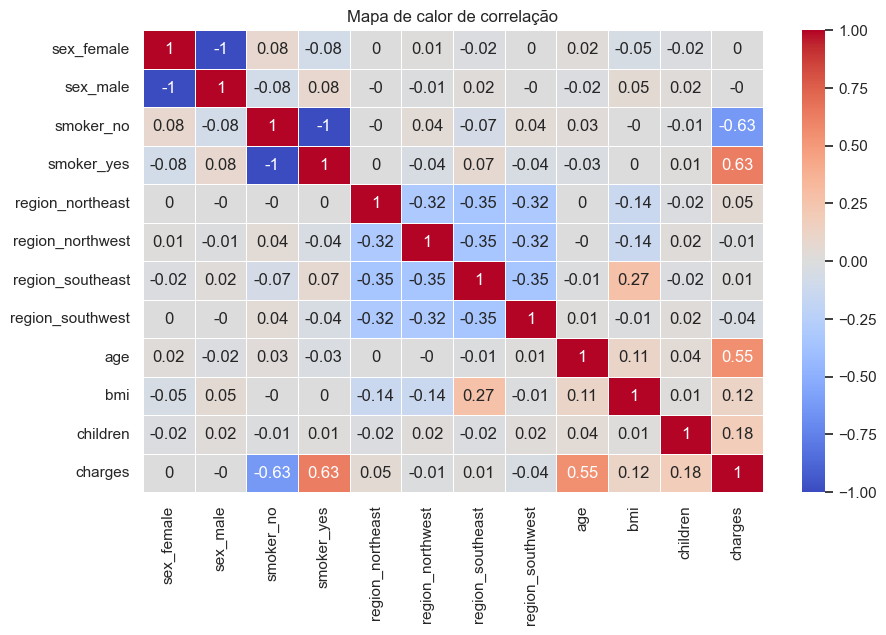

In [18]:
# Gera uma matriz de correlacao
correlation_matrix = result.corr().round(2)

# Plota o heatmap da matriz de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de calor de correlação')
plt.show()

Analisando as correlações acima, podemos verificar que as seguintes variáveis possuem uma forte correlação com os gastos:

    Fumante - Índice de correlação de 0.63.
    Idade - Índice de correlação de 0.55.

Houveram também variáveis com uma correlação fraca, mas que talvez possa ser considerada:

    Filhos - Índice de 0.18.
    IMC - Índice de 0.12.

Curiosamente, ao contrário do que parecia ser natural inferir ao analisar as distribuições, o gênero não mostrou ter nenhuma correlação com os custos.

Ou seja, eram os outros fatores que eram significantes (como fumar ou ter idade avançada). Caso tivéssemos precipitadamente concluído que o fator principal era o sexo (por consequência de fatores comportamentais do mesmo), poderíamos ter criado conclusões totalmente erradas que não atenderiam bem nossos clientes em um mundo real.

Outras correlações, que embora não sejam importantes para nosso cenário, se mostram interessantes:

    1 - Pessoas da região sudeste, tendem a ter um imc maior.
    2 - Pessoas mais velhas, também tendem a ter um imc maior.
    3 - Pessoas das regiões nordeste e noroeste, são as que tendem a ter um imc menor.
